# Make a simple FeedForward network for the bus data

## Initialization

In [1]:
import sys
sys.path.append('../misc')

from MoviaBusDataset import MoviaBusDataset
from BaseNetwork import BaseNetwork
import torch
from torch.nn import Linear, Sequential, ReLU, L1Loss, BatchNorm1d, Dropout2d
from torch.optim import Adam, lr_scheduler
import numpy as np
from FNN import FNN

%load_ext autoreload
%autoreload 2


## Import data using the MoviaBusDataset

In [2]:
previous_timesteps = 6
prediction_steps = 6
batch_size = 25


train = MoviaBusDataset('../data/train', interpolation=True, 
                        prev_timesteps=previous_timesteps, 
                        max_future_time_steps=prediction_steps, 
                        timeofday = True)
validation = MoviaBusDataset('../data/validation', interpolation=True, 
                       prev_timesteps=previous_timesteps, 
                       max_future_time_steps=prediction_steps, 
                       timeofday = True)

#test = MoviaBusDataset('../data/test', interpolation=True, 
#                       prev_timesteps=previous_timesteps, 
#                       max_future_time_steps=prediction_steps, 
#                       timeofday = True,
#                        agg_time=10)

#train.remove_trend()
#test.remove_trend(train._historical_average)

In [3]:
train.remove_trend()
validation.remove_trend(train._historical_average)

## The Model

In [4]:
net = FNN(num_hidden=20,previous_timesteps=previous_timesteps)

optimizer_fun = lambda param : Adam(param, lr=1e-2, weight_decay=0)
scheduler_fun = lambda optim : lr_scheduler.StepLR(optim, step_size=25, gamma=0.1)
criterion = L1Loss()

## Training the network

In [5]:
net.train_network(train, validation,batch_size=batch_size, 
                  num_epochs=50,
                  optimizer_fun=optimizer_fun,
                  scheduler_fun=scheduler_fun,
                  criterion=criterion)

epoch =  0  train loss = 1.404   validation loss = 1.530   output_std = 0.627
Model saved as FNN.pt
epoch =  2  train loss = 1.392   validation loss = 1.525   output_std = 0.728
Model saved as FNN.pt
epoch =  4  train loss = 1.390   validation loss = 1.524   output_std = 0.741
Model saved as FNN.pt
epoch =  6  train loss = 1.388   validation loss = 1.523   output_std = 0.745
Model saved as FNN.pt
epoch =  8  train loss = 1.388   validation loss = 1.522   output_std = 0.742
Model saved as FNN.pt
epoch = 10  train loss = 1.387   validation loss = 1.522   output_std = 0.745
Model saved as FNN.pt
epoch = 12  train loss = 1.387   validation loss = 1.522   output_std = 0.752
Model saved as FNN.pt
epoch = 14  train loss = 1.386   validation loss = 1.522   output_std = 0.748
Model saved as FNN.pt
epoch = 16  train loss = 1.386   validation loss = 1.521   output_std = 0.748
Model saved as FNN.pt
epoch = 18  train loss = 1.386   validation loss = 1.521   output_std = 0.751
epoch = 20  train loss

## Evaluate the network on a test dataset 

In [6]:
scores=[net.get_MAE_score(validation,timestep=i) for i in range(1,prediction_steps+1)]
print(scores)
print(sum(scores)/len(scores))

[1.4688012599945068, 1.5080206394195557, 1.5228253602981567, 1.53152596950531, 1.5421222448349, 1.5539180040359497]
1.5212022463480632


### Example of modelled data vs real data for one road segment 

<IPython.core.display.Javascript object>


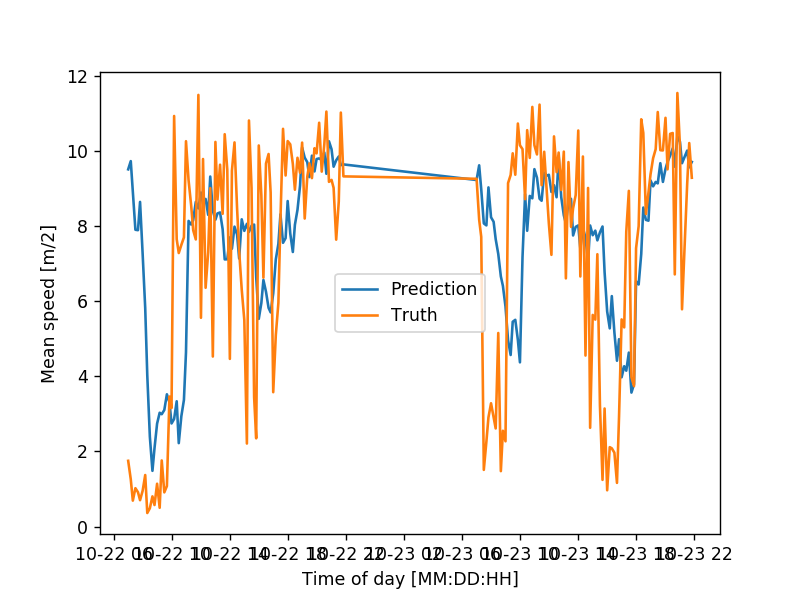

In [7]:
%matplotlib notebook

net.visualize_road(validation,timesteps=6, road=16)

# Overview of testresults 

# Best result:
* prev=6
* lr=1e-2, weight_decay=0, scheduler = on 
* hidden=20
* layers = 2

[1.46816086769104, 1.5096272230148315, 1.5252633094787598, 1.5349218845367432, 1.5443350076675415, 1.5541366338729858]
1.5227408210436504


#### Adding Weight decay 1e-6

[1.4701359272003174, 1.512422800064087, 1.5268144607543945, 1.536346197128296, 1.5445938110351562, 1.553774356842041]
1.5240145921707153


## BatchNorm 
* Batchsize of 5: really bad, 25 and 55 was the same. 
* It basically only finds the best average value
* prev=6
* lr=1e-2, weight_decay=0, scheduler = on 
* hidden=20
* layers = 1

[1.4844785928726196, 1.515394926071167, 1.5261471271514893, 1.5319370031356812, 1.5376396179199219, 1.5414983034133911]
1.5228492617607117



# ANDET
* prev=1
* lr=1e-4, weight_decay=0
* hidden=100
* MAE = 
[1.3296314477920532,1.5687475204467773,1.633176565170288, 1.6559220552444458,1.6670159101486206,1.6737109422683716]
1.5880340735117595



* prev=2
* lr=1e-4, weight_decay=0
* hidden=100
* MAE = 
[1.3325395584106445,1.5618607997894287,1.618654489517212,1.6406718492507935,1.6521214246749878, 1.659730076789856]
1.577596366405487



* prev=4
* lr=1e-4, weight_decay=0
* hidden=100
* MAE = 
[1.3421387672424316, 1.5452213287353516, 1.5943026542663574, 1.6157820224761963, 1.6295769214630127, 1.6383533477783203]
1.560895840326945



* prev=6
* lr=1e-4, weight_decay=0
* hidden=100
* MAE = 
[1.3075246810913086, 1.5262647867202759, 1.5778799057006836, 1.5982773303985596, 1.6123411655426025, 1.6229829788208008]
1.5408784747123718

* prev=8
* lr=1e-4, weight_decay=0
* hidden=100
* MAE = 
[1.3343786001205444, 1.5327132940292358, 1.5762120485305786, 1.595715045928955, 1.6098235845565796, 1.6211355924606323]
1.5449963609377544


* prev=12
* lr=1e-4, weight_decay=0
* hidden=100
* MAE = 
[1.3349711894989014, 1.5302950143814087, 1.571548581123352, 1.5893137454986572, 1.6023231744766235, 1.612109899520874]
1.5400936007499695


In [8]:
validation._historical_average


Speed
TimeOfDay LinkRef                                   
0.227273  103524893:266482296:1195317079   10.714026
          103524902:1242123651:1195317083   8.411511
          103524902:1242123670:3396253208   7.110516
          103524902:3396253208:1242123651   9.997842
          108233932:576722:4279694303      11.091500
          108233935:4279694307:1195317078   5.348762
          108233940:4459313602:4279694306   8.948278
          115678954:1306239263:576726       5.238271
          115678957:282678754:1306239519    3.885667
          115678974:10939966:282678730      7.330222
          115678974:576726:10939966         6.644930
          161632579:295133661:4459313617    3.383577
          161632579:295133661:576724        7.980822
          161632579:4459313617:295133661    4.559219
          161632579:576724:295133661        8.787333
          161632579:576724:8121560          7.880557
          161632579:576725:8121560          8.523016
          161632579:8121560:576724          9.254000
          161632579:8121560:576725          5.341480
          162089321:1649562464:323206292    9.286711
          162089321:323206292:1649562464   10.120222
          162089324:1649384611:1649384672  11.168667
          162089324:1649384672:1649462945  11.370171
          162089324:1649462945:1649384672  10.278139
          162089324:1649462945:20908184    11.643000
          162089324:20908184:1649462945     9.810611
          237099598:1043107528:20908177     9.813667
          237099598:1043107528:323206292   10.471222
          237099598:20908177:1043107528    10.582000
          237099598:323206292:1043107528   10.438500
...                                              ...
0.992424  87398581:8121556:4459313603       5.451973
          87398581:8121556:8121568         11.992681
          87398581:8121557:1696110319       7.048448
          87398581:8121557:8121711          8.800926
          87398581:8121568:8121556          9.697238
          87398581:8121568:8121572         10.497883
          87398581:8121572:1411071138       8.001938
          87398581:8121572:8121568         11.439720
          87398581:8121576:1411071138      10.242500
          87398581:8121576:8121711          4.596096
          87398581:8121711:8121557         10.128014
          87398581:8121711:8121576          7.267713
          87451616:1017928632:1306239377   10.505277
          87451616:1017928632:2025484761   10.357994
          87451616:1306239377:1017928632    4.816558
          87451616:1306239377:1306239666    9.354631
          87451616:1306239666:1306239377    8.225878
          87451616:1306239666:4121323609    8.449799
          87451616:2025484761:1017928632   10.737535
          87451616:4121323609:1306239666   11.665243
          87451616:4121323609:4929002366   10.504994
          87451616:4929002366:4121323609   11.458321
          87502481:4279694293:4279694295    9.499695
          87502481:4279694295:4279694293    4.761784
          87502482:1614362060:1614362080   11.441978
          87502482:1614362080:1614362060   12.125046
          87724803:20908158:20908159       11.164800
          87724803:20908158:792844          7.021849
          87724803:20908159:20908158       10.249665
          87724803:792844:20908158          9.113931

[19584 rows x 1 columns]